# Prepare

In [1]:
# Import default settings
import warnings
warnings.filterwarnings("ignore")

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import joblib


sns.set()
pd.set_option("display.max_columns", None)

import tensorflow as tf
from tensorflow.keras import models

In [2]:
# import trained model and test data

model = models.load_model("model_ep2")

images = np.load("save_files/images.npy")
labels = np.load("save_files/labels.npy")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [4]:
labels

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.], dtype=float32)

# Prediction

In [5]:
y_pred = model.predict(images)

7/7 [==============================] - 2s 9ms/step


In [6]:
test_loss, test_acc = model.evaluate(images, labels, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 1.3035 - accuracy: 0.7000 - 293ms/epoch - 42ms/step

Test accuracy: 0.699999988079071


# Evaluation

In [7]:
from sklearn.metrics import classification_report

cr = classification_report(y_true=labels, y_pred=y_pred>0.75)
print(cr)

              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67       100
         1.0       0.67      0.76      0.71       100

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.70      0.69      0.69       200



In [8]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

cm = confusion_matrix(y_true=labels, y_pred=y_pred>0.75)
cm

array([[63, 37],
       [24, 76]], dtype=int64)

(array([0.5, 1.5]), [Text(0, 0.5, 'Alien'), Text(0, 1.5, 'Predator')])

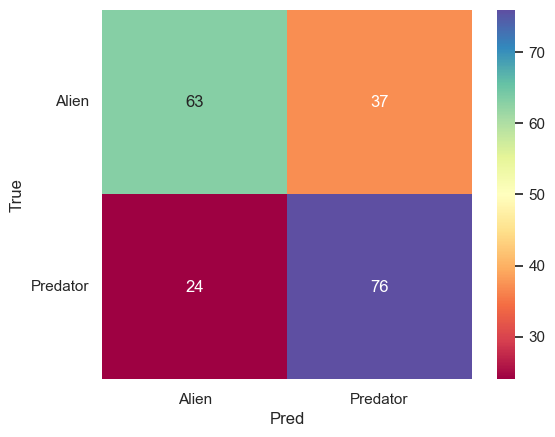

In [9]:
cm = pd.DataFrame(data=cm, index=["Alien", "Predator"], 
                           columns=["Alien", "Predator"])

sns.heatmap(cm, square=True, annot=True, cmap="Spectral")
plt.xlabel("Pred")
plt.ylabel("True")
plt.yticks(rotation=0)


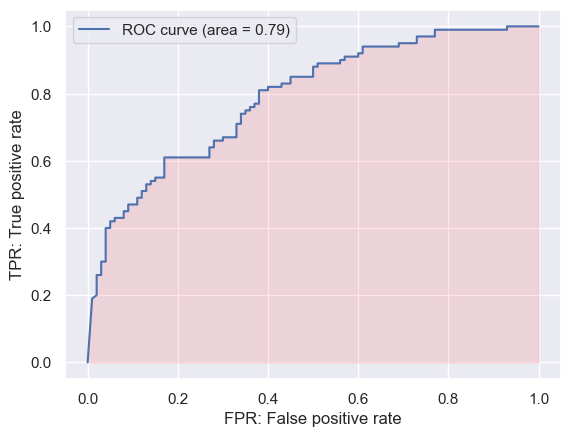

In [10]:
fpr, tpr, thresholds = roc_curve(labels, y_pred)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.fill_between(fpr, tpr, 0, color="red", alpha=0.1)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
# plt.grid()
plt.show()